<a href="https://colab.research.google.com/github/DrSnek/Doctor/blob/main/LungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports:

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import itertools
from sklearn.impute import SimpleImputer

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [49]:
url = "https://drive.google.com/file/d/1cwDX0wo5x4wNDsHVKQQbNnzghhmEJM_X/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,1,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,1,0,0,0,1,1,1,1
2,0,59,0,0,0,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,1,0,1,1,0,0,0


In [50]:
def print_accuracy(y_test, y_pred):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, y_pred)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, y_pred,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)))
  print()

def draw_confusion_matrix(y_test, y_pred, classes):
  plt.cla()
  plt.clf()
  matrix = confusion_matrix(y_test, y_pred)
  plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix")
  plt.colorbar()
  num_classes = len(classes)
  plt.xticks(np.arange(num_classes), classes, rotation=90)
  plt.yticks(np.arange(num_classes), classes)
  fmt = 'd'
  thresh = matrix.max() / 2.
  import itertools
  for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt), horizontalalignment="center", color="white" if matrix[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.show()
  print()

In [51]:
def draw_roc_curve(y_test, y_score, title, c="blue", line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, color=c, lw=line_width, label = 'AUC = %0.3f' % aucroc)
  plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')
  plt.legend(loc = 'lower right')
  plt.show()
  print()

def draw_roc_curve_individual(y_test, y_score, label, line_width=1):
  fpr_log_reg, tpr_log_reg, thresholds = metrics.roc_curve(y_test, y_score)
  # plt.figure(2)
  aucroc = metrics.auc(fpr_log_reg, tpr_log_reg)
  plt.plot(fpr_log_reg, tpr_log_reg, lw=line_width, label = label + ', AUC = %0.3f' % aucroc)
  # plt.title(title)
  plt.xlabel('False Positive Rates')
  plt.ylabel('True Positive Rates')

##Data Analysis:

In [ ]:
sns.pairplot(data = df, hue = 'LUNG_CANCER')

In [ ]:
sns.heatmap(df.corr())

##Model:

In [52]:
user_backup = df
X = df.drop("LUNG_CANCER", axis = 1)
Y = df["LUNG_CANCER"].copy()

print("X shape before processing is", X.shape)
df_numerical = X.drop(["GENDER", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "CHRONIC DISEASE", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"], axis = 1)

numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(df_numerical)
categorical_features = ["GENDER", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "CHRONIC DISEASE", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"]

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features), 
                ("categorical", OneHotEncoder(), categorical_features)
                ])
X_prepared = full_pipeline.fit_transform(X)

print("X shape after processing is", X_prepared.shape)

X shape before processing is (309, 12)
X shape after processing is (309, 23)


In [53]:
x_train, x_test, y_train, y_test = train_test_split(X_prepared, Y, test_size = 0.3, random_state = 42)

In [ ]:
'''
model = MultinomialNB(alpha = 1.0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score for Naive Bayes: ", (accuracy_score(y_pred,y_test) * 100),"%")
'''

###Decision Tree Classifier

In [54]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

Accuracy:    0.967742
Precision:   0.977011
Recall:      0.988372
F1 Score:    0.982659



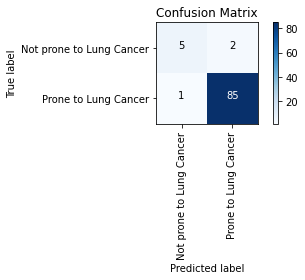

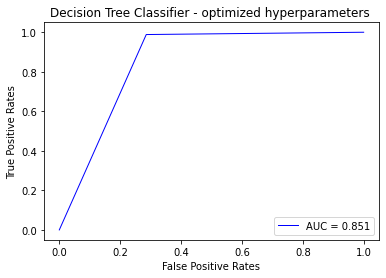

In [55]:
print_accuracy(y_test, pred)
draw_confusion_matrix(y_test, pred, ["Not prone to Lung Cancer", "Prone to Lung Cancer"])
draw_roc_curve(y_test, pred, "Decision Tree Classifier - optimized hyperparameters ", c="blue", line_width=1)

In [56]:
cancer_placeholder = 1
user_input = [[1, 18, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, cancer_placeholder]]

user_df = pd.DataFrame(user_input, columns=["GENDER", "AGE", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "CHRONIC DISEASE", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN", "LUNG CANCER"])
df = user_backup.append(user_df, ignore_index=True)

X = df.drop("LUNG_CANCER", axis = 1)
Y = df["LUNG_CANCER"].copy()

print("X shape before processing is", X.shape)
df_numerical = X.drop(["GENDER", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "CHRONIC DISEASE", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"], axis = 1)
print(df_numerical)
numerical_pipeline = Pipeline([
                               ("std_scaler", StandardScaler())
                               ])

numerical_features = list(df_numerical)
categorical_features = ["GENDER", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "CHRONIC DISEASE", "WHEEZING", "ALCOHOL CONSUMING", "COUGHING", "SHORTNESS OF BREATH", "SWALLOWING DIFFICULTY", "CHEST PAIN"]

full_pipeline = ColumnTransformer([
                ("numerical", numerical_pipeline, numerical_features), 
                ("categorical", OneHotEncoder(), categorical_features)
                ])
user_inp = full_pipeline.fit_transform(X)

print("X shape after processing is", X.shape)


X shape before processing is (310, 13)
     AGE  LUNG CANCER
0     69          NaN
1     74          NaN
2     59          NaN
3     63          NaN
4     63          NaN
..   ...          ...
305   70          NaN
306   58          NaN
307   67          NaN
308   62          NaN
309   18          1.0

[310 rows x 2 columns]
X shape after processing is (310, 13)


In [59]:
u_prepared = np.array([user_inp[-1][0:23]])
print(u_prepared)
y_temp = clf.predict(u_prepared)
print(y_temp[0])

[[-5.19782412  0.          0.          1.          1.          0.
   1.          0.          0.          1.          1.          0.
   0.          1.          0.          1.          0.          1.
   0.          1.          0.          1.          0.        ]]
0
